In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Set the directories for the training and validation datasets
train_dir = 'data/train'
val_dir = 'data/test'

In [3]:
# Set the parameters for the image preprocessing
img_width, img_height = 224, 224
batch_size = 32

In [4]:
# Create data generators to preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 671 images belonging to 7 classes.


In [6]:
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='categorical')

Found 154 images belonging to 7 classes.


In [11]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
epochs = 50
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

Epoch 1/50
21/21 [==============================] - 25s 1s/step - loss: 2.4603 - accuracy: 0.1744 - val_loss: 2.0023 - val_accuracy: 0.1429
Epoch 2/50
21/21 [==============================] - 21s 992ms/step - loss: 1.9084 - accuracy: 0.1967 - val_loss: 2.0416 - val_accuracy: 0.1429
Epoch 3/50
21/21 [==============================] - 22s 1s/step - loss: 1.9099 - accuracy: 0.2057 - val_loss: 2.0680 - val_accuracy: 0.1429
Epoch 4/50
21/21 [==============================] - 20s 964ms/step - loss: 1.9067 - accuracy: 0.2086 - val_loss: 1.9781 - val_accuracy: 0.1753
Epoch 5/50
21/21 [==============================] - 24s 1s/step - loss: 1.8827 - accuracy: 0.2057 - val_loss: 1.9858 - val_accuracy: 0.1623
Epoch 6/50
21/21 [==============================] - 21s 993ms/step - loss: 1.8732 - accuracy: 0.2191 - val_loss: 1.9215 - val_accuracy: 0.1623
Epoch 7/50
21/21 [==============================] - 20s 973ms/step - loss: 1.8581 - accuracy: 0.2325 - val_loss: 2.4963 - val_accuracy: 0.1948
Epoch 8/

In [15]:
# Save the trained model
model.save('emotion.h5')

RuntimeError: Can't decrement id ref count (unable to extend file properly)

In [17]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [18]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

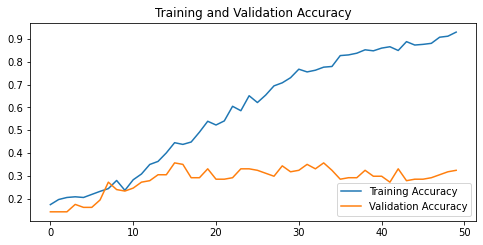

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

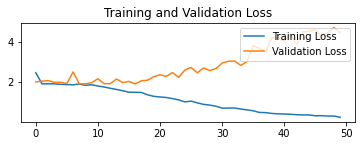

In [20]:
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (4).

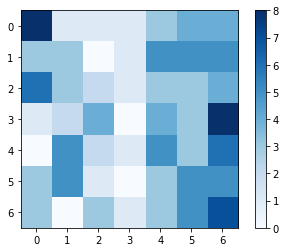

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# Generate predictions and compute the confusion matrix
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_generator.classes, y_pred)

# Define class labels
class_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# Set the x-axis and y-axis labels
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label')
# Rotate the x-axis labels to vertical orientation
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
# Loop over the data and annotate each cell with its value
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
# Add a title to the plot
ax.set_title("Confusion matrix")
fig.tight_layout()
plt.show()


In [19]:
from sklearn.metrics import classification_report

# Generate predictions
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the class labels
class_labels = list(val_generator.class_indices.keys())

# Generate the classification report
report = classification_report(val_generator.classes, y_pred, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

  EOSINOPHIL       0.17      0.18      0.17        11
  LYMPHOCYTE       0.42      0.45      0.43        11
    MONOCYTE       0.22      0.18      0.20        11
  NEUTROPHIL       0.36      0.36      0.36        11

    accuracy                           0.30        44
   macro avg       0.29      0.30      0.29        44
weighted avg       0.29      0.30      0.29        44



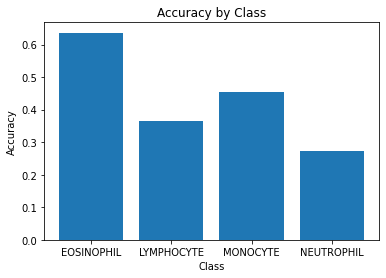

In [20]:
# Get the class labels
class_labels = list(val_generator.class_indices.keys())

# Get the class-wise accuracy values
class_wise_accuracy = cm.diagonal() / cm.sum(axis=1)

# Create a bar chart
plt.bar(class_labels, class_wise_accuracy)
plt.title('Accuracy by Class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()


In [21]:
# Evaluate the model on the validation data
_, accuracy = model.evaluate(val_generator)

# Print the validation accuracy
print('Validation Accuracy: %.2f' % (accuracy*100))


2/2 [==============================] - 0s 63ms/step - loss: 0.2392 - accuracy: 0.9091
Validation Accuracy: 90.91


In [22]:
# Get the accuracy from the history object
accuracy = history.history['accuracy'][-1]

# Print the accuracy to the console
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.06%
